# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [1]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [2]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 1. Display one raw image directly from your drive

In [14]:
def load_images_from_folder(folder, size=(128,128)):
    images = []
    labels = []

    for root, dirs, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = cv2.imread(file_path)
                if img is not None:
                    img = cv2.resize(img, size)   # resize to fixed size
                    images.append(img)
                    labels.append(os.path.basename(root))  # use folder name as label
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    return np.array(images), np.array(labels)

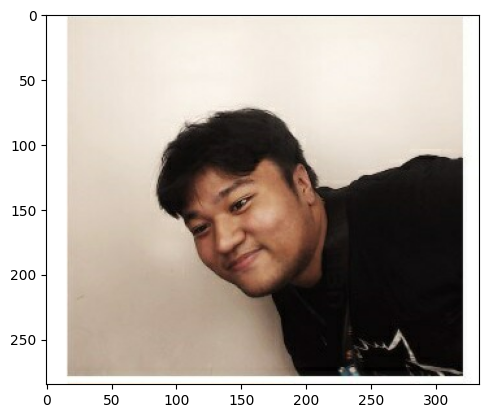

In [6]:
displayImage('/content/drive/My Drive/images/Trains/Mago, Karl/3213.jpg')


In [15]:
images, labels = load_images_from_folder('/content/drive/My Drive/images/Trains')

In [16]:
images.shape


(373, 128, 128, 3)

In [17]:
labels.shape


(373,)

In [20]:
print(images[0].shape)

(128, 128, 3)


In [18]:
labels


array(['Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
      

## 2. Load the images from your drive and apply preprocessing to your raw images

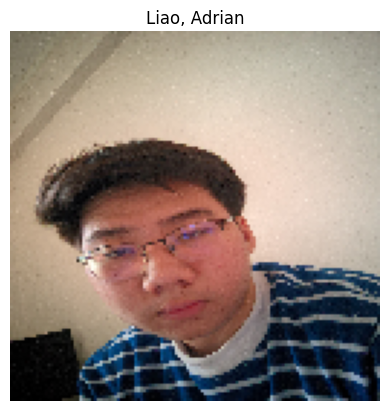

In [22]:
image = images[0]   # already a 3D array
name = labels[0]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # convert BGR → RGB
plt.title(name)
plt.axis("off")
plt.show()

## 3. Display one pre-processed image from the training set

In [23]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [25]:
images, labels = load_images_from_folder('/content/drive/My Drive/images/Trains')


In [26]:
images.shape


(373, 10000)

In [27]:
labels.shape


(373,)

In [28]:
labels


array(['Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
       'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian', 'Liao, Adrian',
      

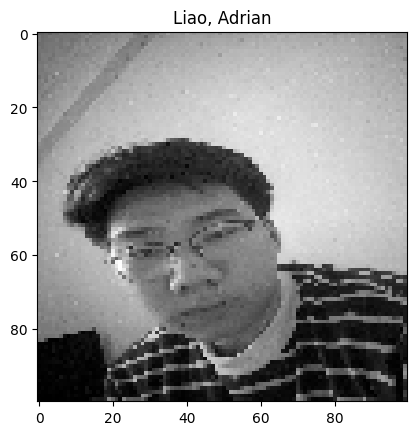

In [29]:
# Get a sample image and its corresponding name
image = images[0].reshape(100,100)  # Access the first image
name = labels[0]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()


## 4. Display ten pre-processed images from the training set

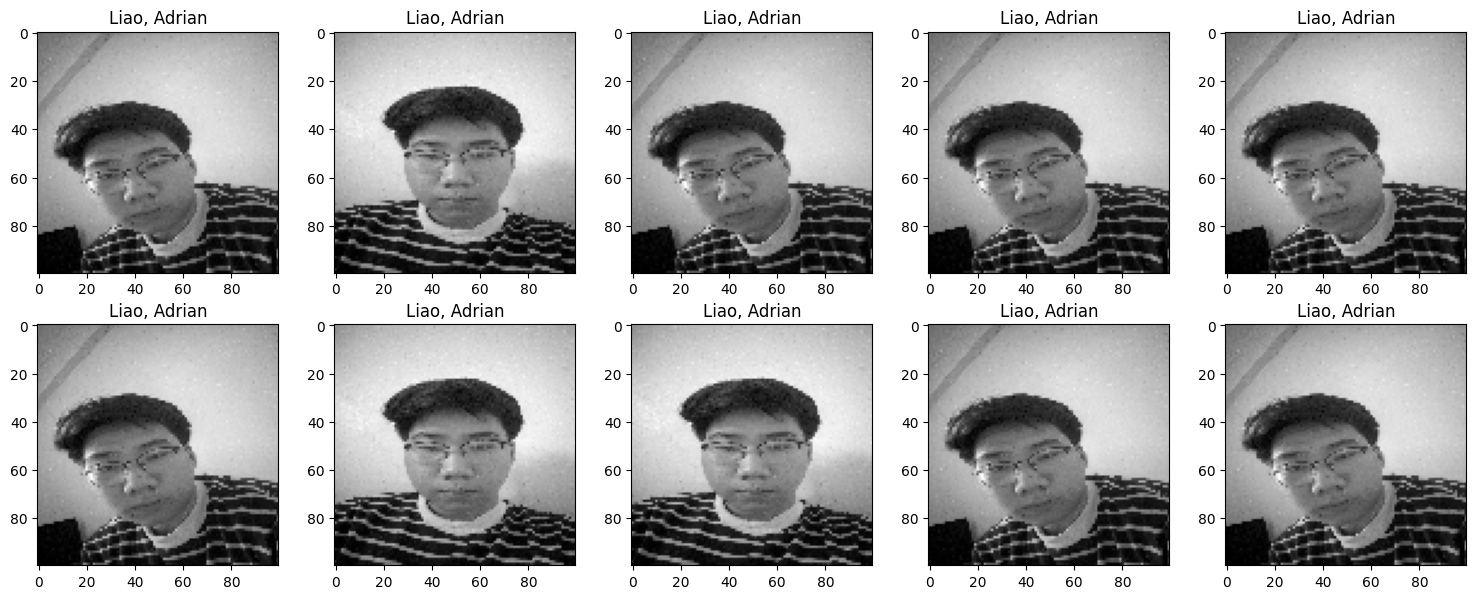

In [30]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()


## 5. Split your training data

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## 6. Train your SVM model

In [32]:
from sklearn import svm

model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC()

## 7. Evaluate your SVM model

In [33]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

In [34]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image from {img_path}")
        return None # Return None to indicate failure
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

Predicted label: ['Mago, Karl']


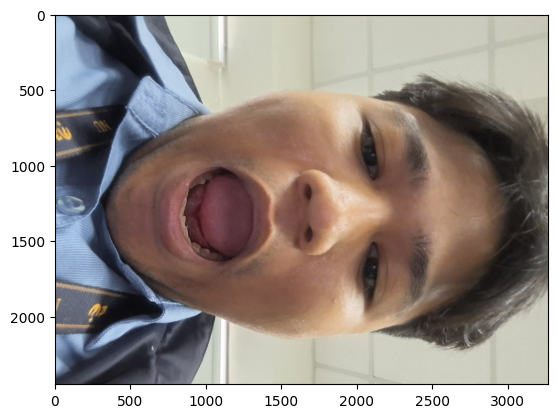

In [48]:
20251003_112815
img_path = '/content/drive/My Drive/images/Test/lol.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


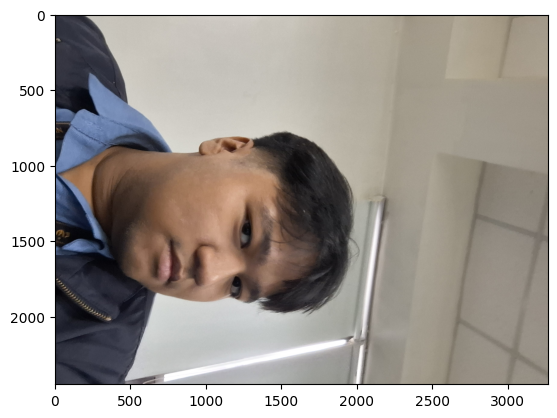

In [45]:
20251003_112815
img_path = '/content/drive/My Drive/images/Test/Mago3.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


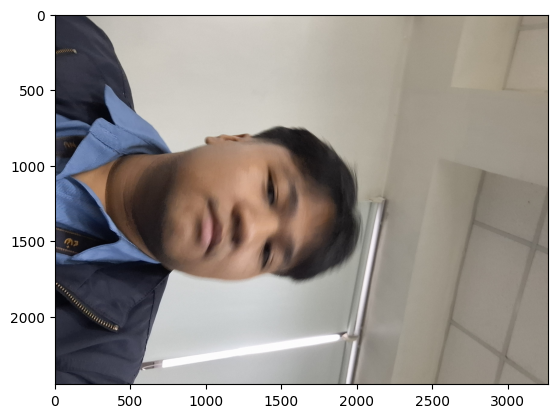

In [43]:
20251003_112815
img_path = '/content/drive/My Drive/images/Test/20251003_112815.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


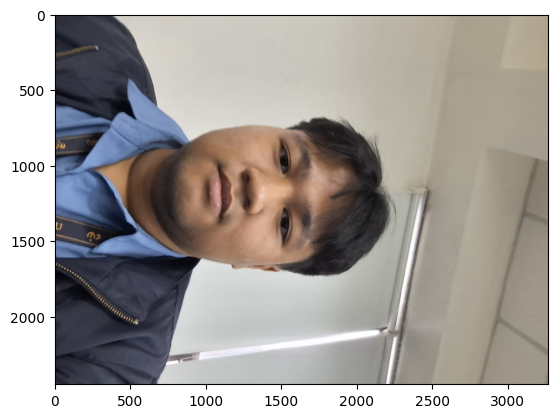

In [39]:
img_path = '/content/drive/My Drive/images/Test/Mago1.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


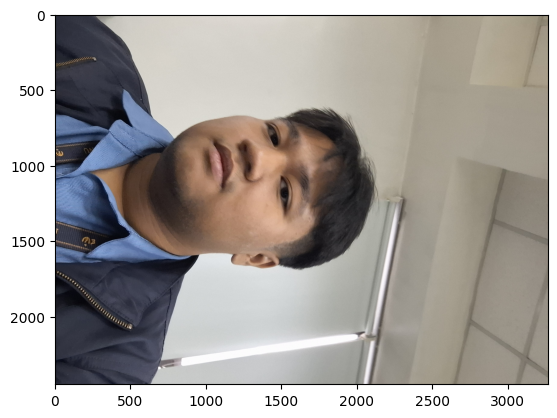

In [42]:
img_path = '/content/drive/My Drive/images/Test/20251003_112813(0).jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


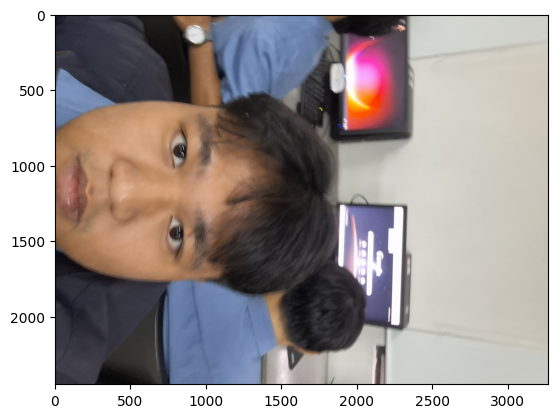

In [41]:
img_path = '/content/drive/My Drive/images/Test/Mago4.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


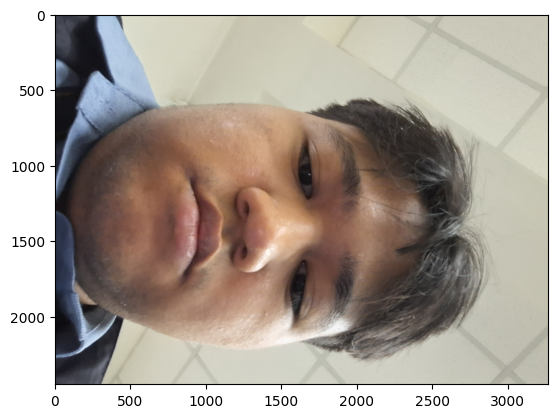

In [44]:
img_path = '/content/drive/My Drive/images/Test/20251003_112834.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


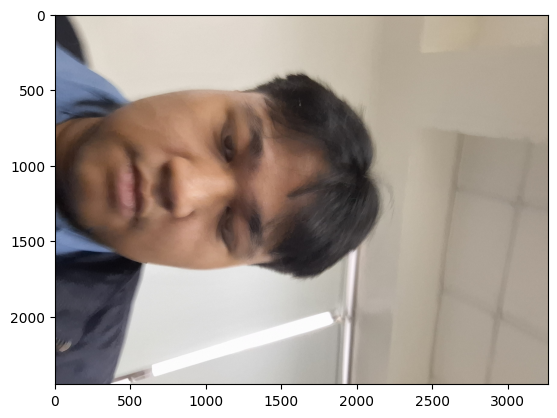

In [38]:
img_path = '/content/drive/My Drive/images/Test/Mago2.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


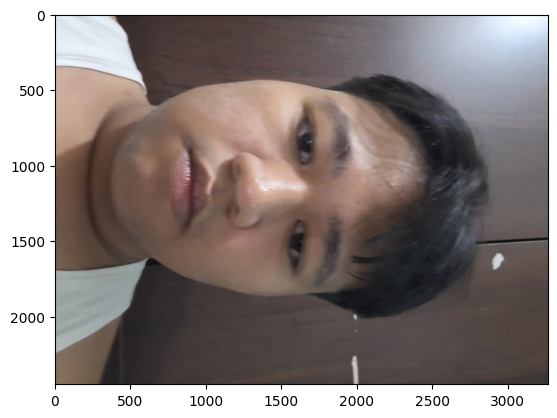

In [35]:
img_path = '/content/drive/My Drive/images/Test/magotesr.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Liao, Adrian']


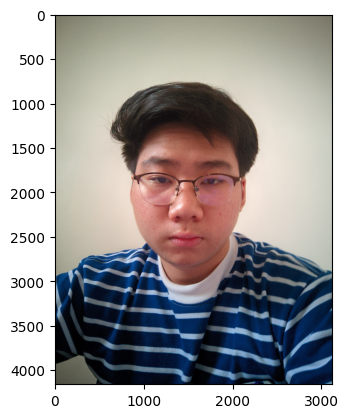

In [36]:

img_path = '/content/drive/My Drive/images/Test/5.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Liao, Adrian']


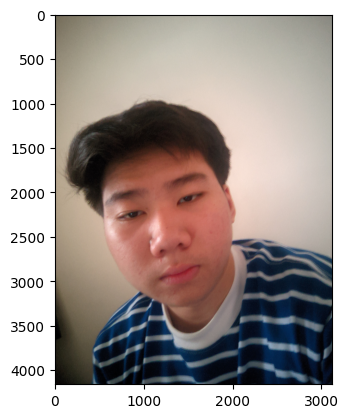

In [49]:

img_path = '/content/drive/My Drive/images/Test/1.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Liao, Adrian']


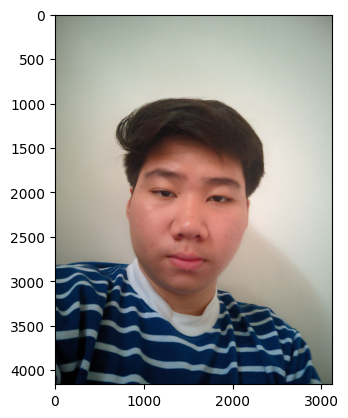

In [50]:

img_path = '/content/drive/My Drive/images/Test/2.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Liao, Adrian']


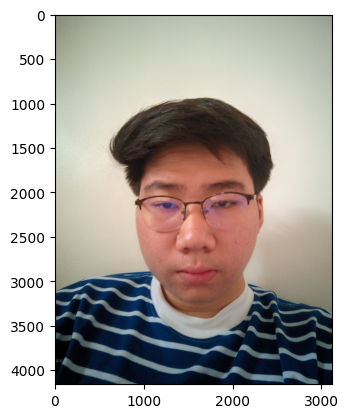

In [51]:

img_path = '/content/drive/My Drive/images/Test/3.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Liao, Adrian']


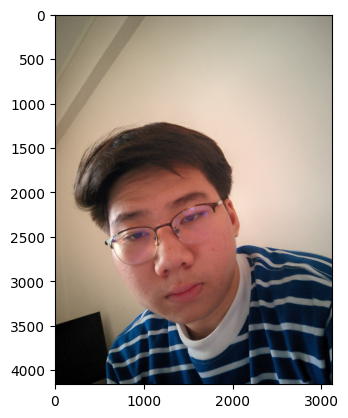

In [52]:

img_path = '/content/drive/My Drive/images/Test/4.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


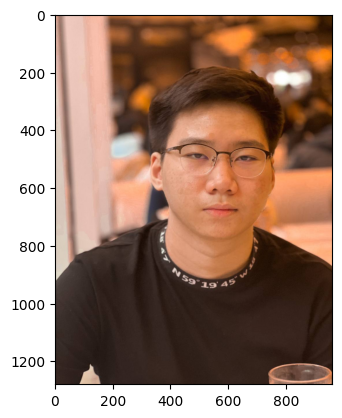

In [53]:

img_path = '/content/drive/My Drive/images/Test/6.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


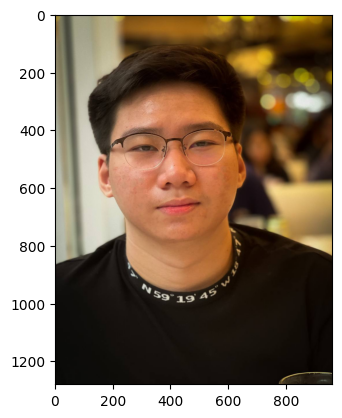

In [54]:

img_path = '/content/drive/My Drive/images/Test/7.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


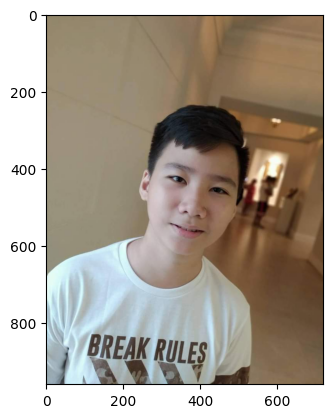

In [63]:

img_path = '/content/drive/My Drive/images/Test/8.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


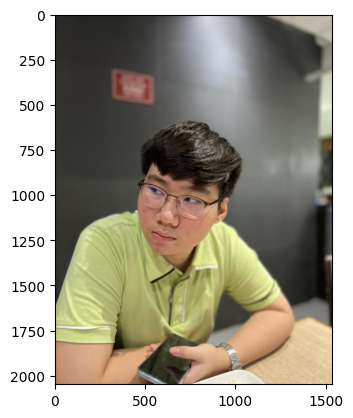

In [62]:

img_path = '/content/drive/My Drive/images/Test/9.jpeg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mago, Karl']


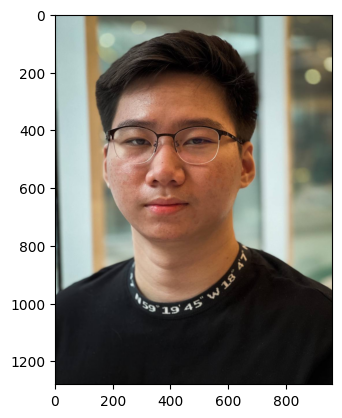

In [64]:

img_path = '/content/drive/My Drive/images/Test/10.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)